In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [52]:
data1 = pd.read_excel("../L'Oreal/daily_traffic_mars_old_randomized.xlsx")
data2 = pd.read_csv("../L'Oreal/rescaled_traffic_store.csv", encoding="latin1")
data3 = pd.read_csv("../L'Oreal/train_kiehls_anonimized_sellout.csv")

In [53]:
# Only take *United States* out of overall dataframe
df1 = data1
df1['day'] = pd.to_datetime(df1['day'], format='%Y/%m/%d')
df1['day'] = pd.to_datetime(df1['day'])
df2 = data2.loc[data2["country_code_iso2"] == 'US']
df2['day'] = pd.to_datetime(df2['day'], format='%Y/%m/%d')
df3 = data3.loc[data3["country_name_en"] == 'United States of America']
df3['day'] = pd.to_datetime(df3['day'], format='%Y/%m/%d').dt.date.astype(str)
df3['day'] = pd.to_datetime(df3['day'])

# Find holidays
df2['day_type'] = np.where(df2['day'].dt.dayofweek < 5, 'Weekday', 'Weekend')
cal = calendar()
holidays = cal.holidays(start = df2['day'].min(), end = df2['day'].max())
df2['day_type'] = np.where(df2['day'].isin(holidays), 'Holiday', df2['day_type'])
df2 = df2.sort_values('day')

# Create new dataframe df2_new to do visualization beacuse most of df2['passby_traffic'] = 0
df2_new = df2.loc[df2['passby_traffic'] > 0]
df2_new = df2_new.sort_values('day')
# df2.set_index('day', inplace=True, drop=False)

C:\Users\Astron\AppData\Local\Temp/ipykernel_61876/3207216046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'] = pd.to_datetime(df2['day'], format='%Y/%m/%d')
C:\Users\Astron\AppData\Local\Temp/ipykernel_61876/3207216046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['day'] = pd.to_datetime(df3['day'], format='%Y/%m/%d').dt.date.astype(str)
C:\Users\Astron\AppData\Local\Temp/ipykernel_61876/3207216046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Text(0, 0.5, 'Passby Traffic')

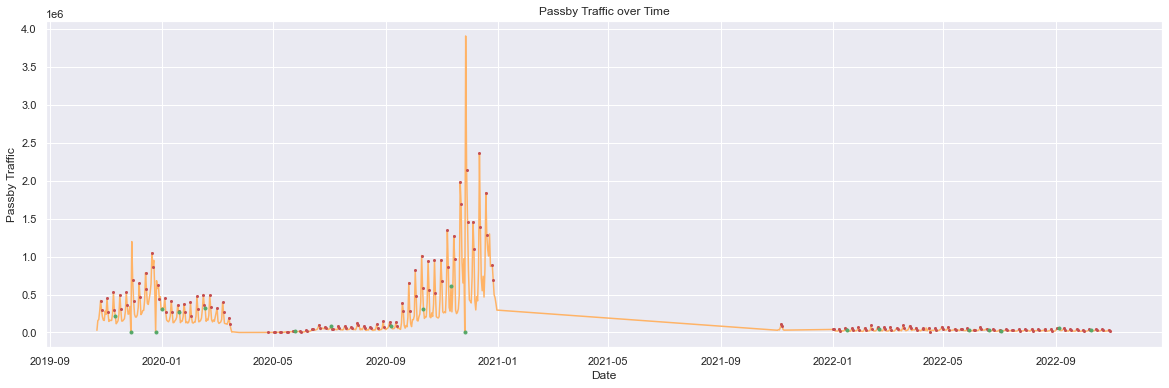

In [54]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df2_new['day'], df2_new['passby_traffic'], color=(1.0, 0.7, 0.4))
ax.plot(df2_new[df2_new['day_type'] == 'Weekend']['day'], df2_new.loc[df2_new['day_type'] == 'Weekend', 'passby_traffic'], 'ro', markersize=2)
ax.plot(df2_new[df2_new['day_type'] == 'Holiday']['day'], df2_new.loc[df2_new['day_type'] == 'Holiday', 'passby_traffic'], 'go', markersize=3)
ax.set_title('Passby Traffic over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Passby Traffic')
# We can see that 'Passby Traffic' tend to be high in weekends and holidays

Text(0, 0.5, 'Total Number of Visitors')

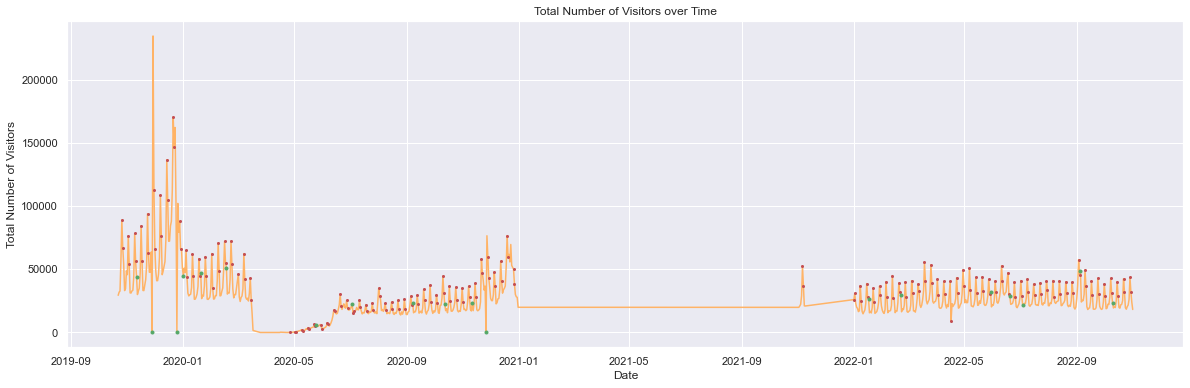

In [55]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df2_new['day'], df2_new['total_nb_visitor'], color=(1.0, 0.7, 0.4))
ax.plot(df2_new[df2_new['day_type'] == 'Weekend']['day'], df2_new.loc[df2_new['day_type'] == 'Weekend', 'total_nb_visitor'], 'ro', markersize=2)
ax.plot(df2_new[df2_new['day_type'] == 'Holiday']['day'], df2_new.loc[df2_new['day_type'] == 'Holiday', 'total_nb_visitor'], 'go', markersize=3)
ax.set_title('Total Number of Visitors over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Total Number of Visitors')
# We can see that 'Number of Visitors' tend to be high in weekends and holidays

Text(0, 0.5, 'Visiting Duration')

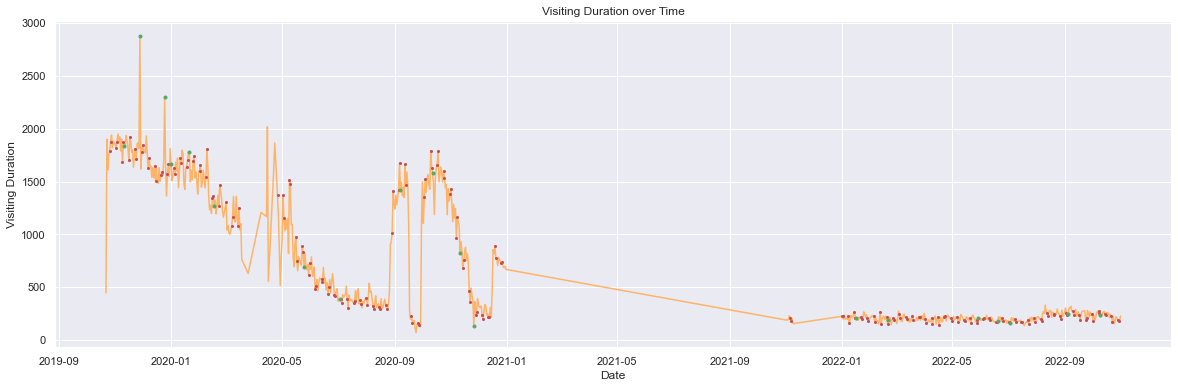

In [56]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df2_new['day'], df2_new['visit_duration'], color=(1.0, 0.7, 0.4))
ax.plot(df2_new[df2_new['day_type'] == 'Weekend']['day'], df2_new.loc[df2_new['day_type'] == 'Weekend', 'visit_duration'], 'ro', markersize=2)
ax.plot(df2_new[df2_new['day_type'] == 'Holiday']['day'], df2_new.loc[df2_new['day_type'] == 'Holiday', 'visit_duration'], 'go', markersize=3)
ax.set_title('Visiting Duration over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Visiting Duration')
# We can see that 'Visiting Duration' tend to be high in holidays, but not necessarily in weekends during 2020-05 - 2020.09

Text(0, 0.5, 'Wifi Events')

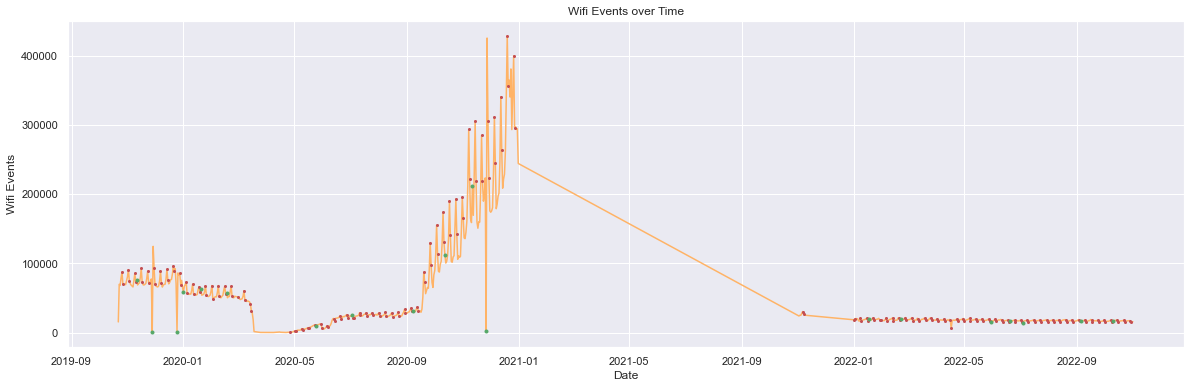

In [57]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df2_new['day'], df2_new['wifi_events'], color=(1.0, 0.7, 0.4))
ax.plot(df2_new[df2_new['day_type'] == 'Weekend']['day'], df2_new.loc[df2_new['day_type'] == 'Weekend', 'wifi_events'], 'ro', markersize=2)
ax.plot(df2_new[df2_new['day_type'] == 'Holiday']['day'], df2_new.loc[df2_new['day_type'] == 'Holiday', 'wifi_events'], 'go', markersize=3)
ax.set_title('Wifi Events over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Wifi Events')
# We can see that 'Wifi Events' tend to be high in holidays and weekends. From observations above, we should add holidays
# and weekends when doing prediction.

d:\python3.9.6-64bit\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


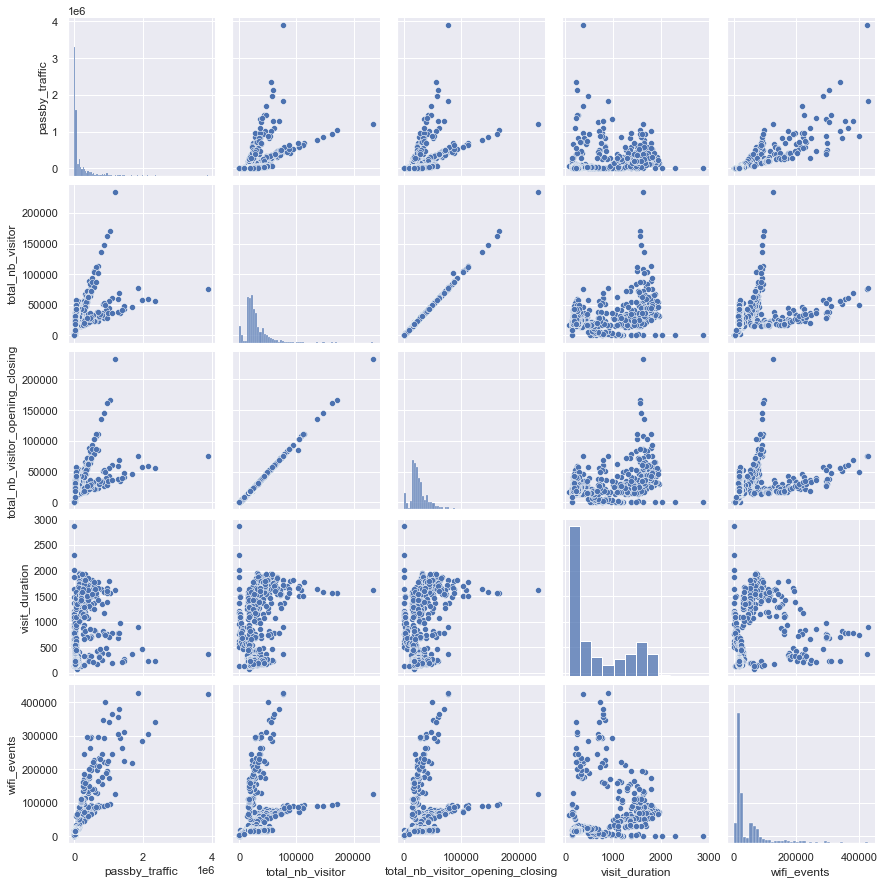

In [58]:
sns.set()
# Correlation to passby_traffic
cols = ['passby_traffic', 'total_nb_visitor', 'total_nb_visitor_opening_closing','visit_duration', 'wifi_events']
sns.pairplot(df2_new[cols], size = 2.5)
plt.show()

In [59]:
# Merge df2 and df3
df23 = pd.merge(df2, df3, on='day', how='inner')
df23.drop('Unnamed: 0_x', axis=1, inplace=True)
df23.drop('Unnamed: 0_y', axis=1, inplace=True)

d:\python3.9.6-64bit\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


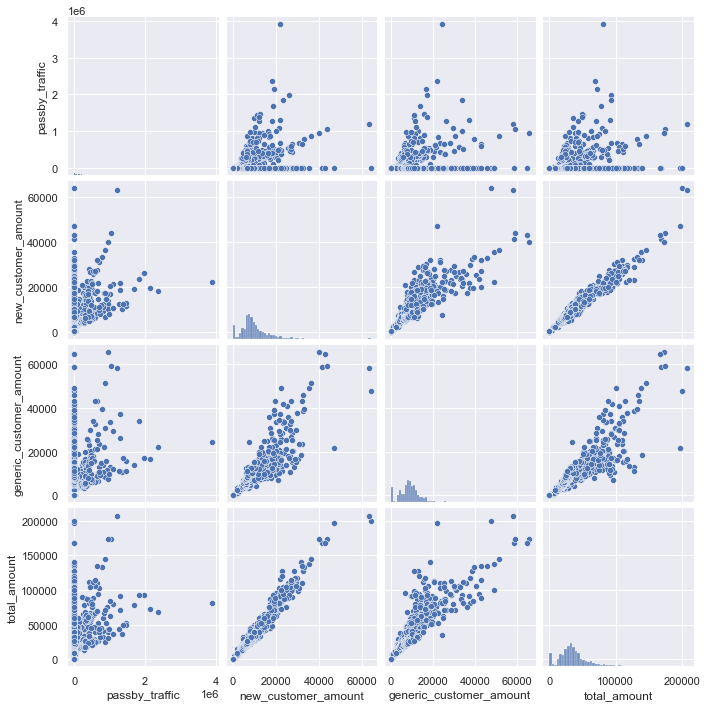

In [60]:
sns.set()
# Correlation to 'passby_traffic' - higher pass_by leads to high number of customer amount
cols = ['passby_traffic', 'new_customer_amount', 'generic_customer_amount', 'total_amount']
sns.pairplot(df23[cols], size = 2.5)
plt.show()

In [61]:
grouped_df1 = df1.groupby(['CORE_LB_State']).mean()
grouped_df1.drop('Unnamed: 0', axis = 1, inplace = True)
grouped_df1.head(5)

,CORE_VL_NbEntry,CORE_VL_NbExit,CORE_LB_SalesSurface,CORE_LB_StockSurface
CORE_LB_State,,,,
AL,14.469577,0.006614,782.000000,1000.000000
AZ,24.513258,0.001515,737.386364,975.075758
CA,52.568190,0.384663,907.745493,1164.254711
CO,28.457447,0.000000,981.000000,1340.000000
CT,24.631652,0.000000,757.752412,965.044665


<AxesSubplot:xlabel='CORE_LB_State', ylabel='CORE_VL_NbEntry'>

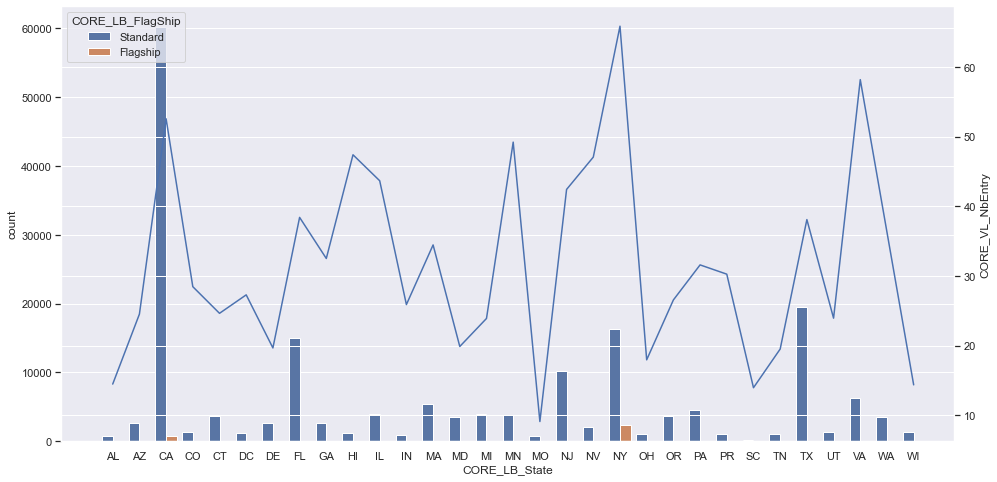

In [62]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()
sns.countplot(x='CORE_LB_State', hue='CORE_LB_FlagShip', data=df1, ax=ax1)
sns.lineplot(x = grouped_df1.index, y = grouped_df1['CORE_VL_NbEntry'], ax=ax2)
# sns.lineplot(x = grouped_df1.index, y = grouped_df1['CORE_VL_NbExit'], ax=ax2)
# sns.lineplot(x = grouped_df1.index, y = grouped_df1['CORE_LB_SalesSurface'], ax=ax2)
# sns.lineplot(x = grouped_df1.index, y = grouped_df1['CORE_LB_StockSurface'], ax=ax2)

<AxesSubplot:xlabel='CORE_LB_State', ylabel='CORE_VL_NbExit'>

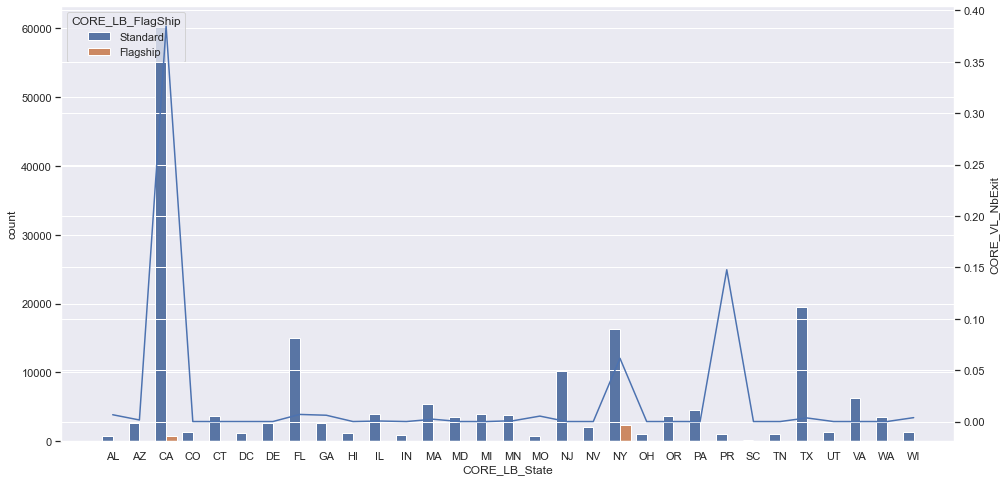

In [64]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()
sns.countplot(x='CORE_LB_State', hue='CORE_LB_FlagShip', data=df1, ax=ax1)
sns.lineplot(x = grouped_df1.index, y = grouped_df1['CORE_VL_NbExit'], ax=ax2)

<AxesSubplot:xlabel='CORE_LB_State', ylabel='CORE_LB_SalesSurface'>

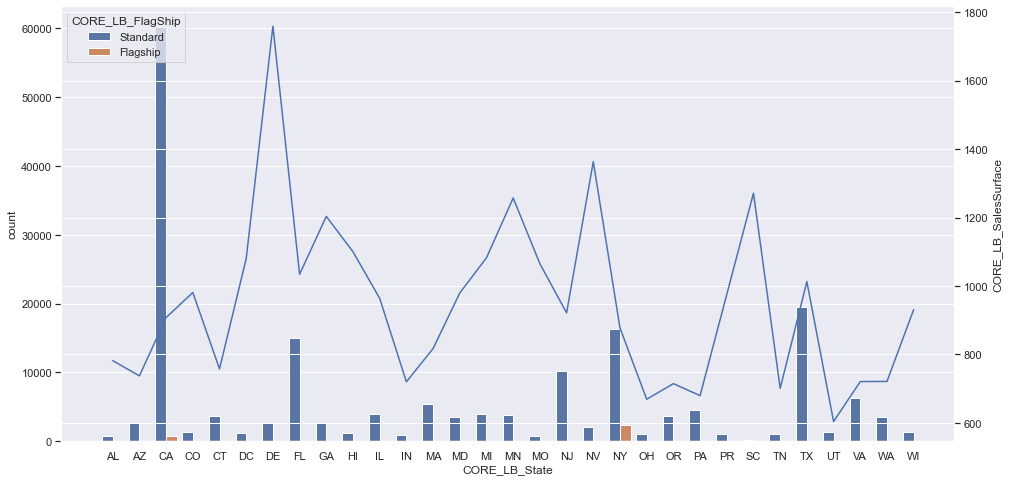

In [66]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()
sns.countplot(x='CORE_LB_State', hue='CORE_LB_FlagShip', data=df1, ax=ax1)
sns.lineplot(x = grouped_df1.index, y = grouped_df1['CORE_LB_SalesSurface'], ax=ax2)

<AxesSubplot:xlabel='CORE_LB_State', ylabel='CORE_LB_StockSurface'>

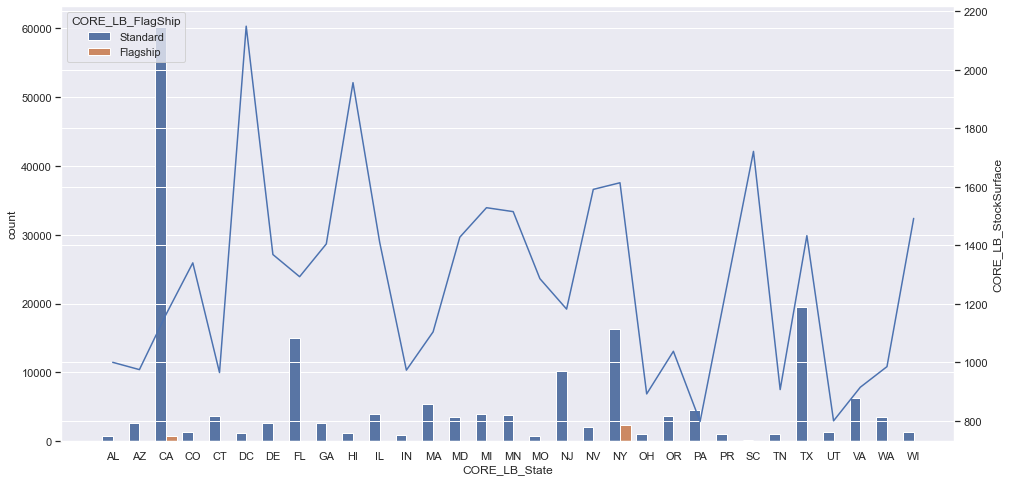

In [67]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()
sns.countplot(x='CORE_LB_State', hue='CORE_LB_FlagShip', data=df1, ax=ax1)
sns.lineplot(x = grouped_df1.index, y = grouped_df1['CORE_LB_StockSurface'], ax=ax2)

<AxesSubplot:xlabel='CORE_LB_State', ylabel='CORE_LB_StockSurface'>

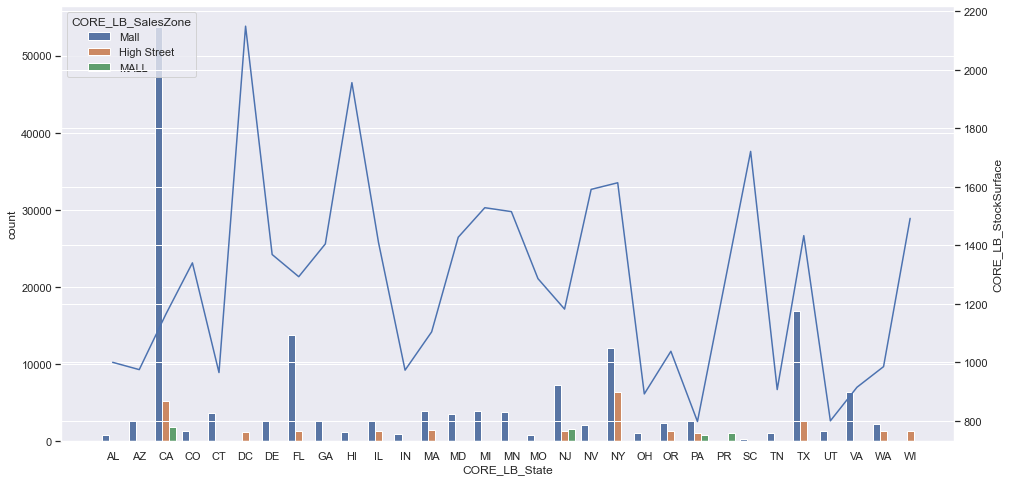

In [69]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()
sns.countplot(x='CORE_LB_State', hue='CORE_LB_SalesZone', data=df1, ax=ax1)
sns.lineplot(x = grouped_df1.index, y = grouped_df1['CORE_LB_StockSurface'], ax=ax2)

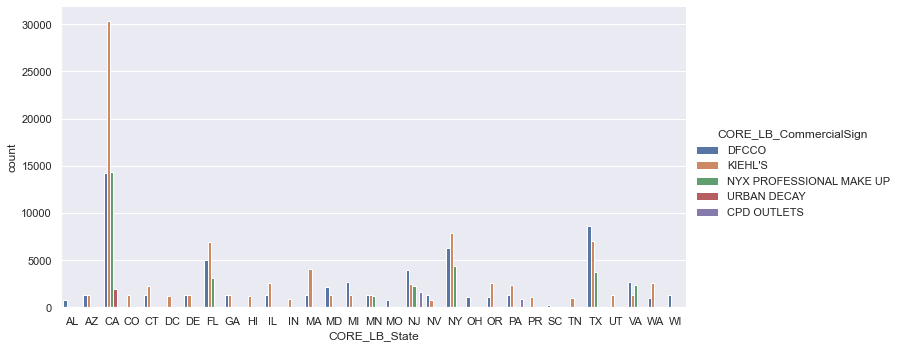

In [ ]:
sns.catplot(x='CORE_LB_State', hue='CORE_LB_CommercialSign', kind='count', data=df1, height=5, aspect=2)

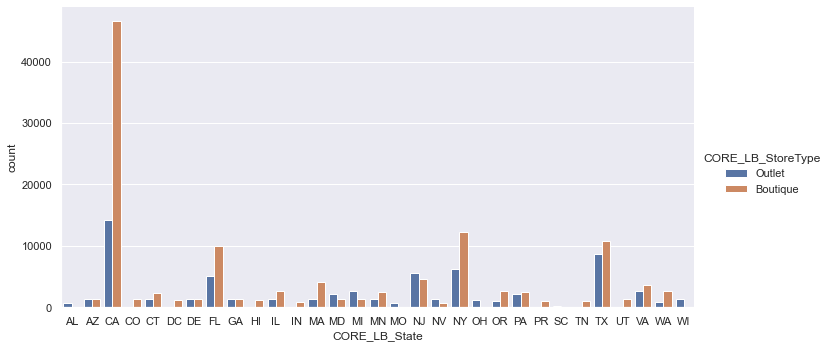

In [ ]:
sns.catplot(x='CORE_LB_State', hue='CORE_LB_StoreType', kind='count', data=df1, height=5, aspect=2)